In [1]:
import contextily as ctx
import datetime
import geopandas as gpd
import libpysal
import numpy as np
import os
import pandas as pd
import plotly.express as px
import pysal.lib
import seaborn as sns
import time
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union

Define usable column and filter the data for each years' shape file (AL_D010 - GIS건물통합정보)

In [6]:
# 1st Shape File
shapefile_data = [
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2015.shp", 2015),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2016.shp", 2016),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2017.shp", 2017),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2018.shp", 2018),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2019.shp", 2019),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2020.shp", 2020),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2021.shp", 2021),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2022.shp", 2022),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2023.shp", 2023),
    ("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2024.shp", 2024)
     ]

# Create output directory 
output_dir = "/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/Useful Column"
os.makedirs(output_dir, exist_ok=True)

In [8]:
# Get attributes from documentation
xls = pd.read_excel(os.path.join(os.getcwd(), r'/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/Data/GIS공간통합정보/AL_D010_11_20231007_attribute_table_en.xlsx'))
xls = xls.loc[xls.Division == 'GIS건물통합정보']

흑석동_1st_2015 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2015.shp")
흑석동_1st_2015 = 흑석동_1st_2015.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2016 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2016.shp")
흑석동_1st_2016 = 흑석동_1st_2016.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2017 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2017.shp")
흑석동_1st_2017 = 흑석동_1st_2017.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2018 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2018.shp")
흑석동_1st_2018 = 흑석동_1st_2018.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2019 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2019.shp")
흑석동_1st_2019 = 흑석동_1st_2019.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2020 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2020.shp")
흑석동_1st_2020 = 흑석동_1st_2020.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2021 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2021.shp")
흑석동_1st_2021 = 흑석동_1st_2021.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2022 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2022.shp")
흑석동_1st_2022 = 흑석동_1st_2022.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2023 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2023.shp")
흑석동_1st_2023 = 흑석동_1st_2023.rename(columns=dict(xls[['Code', 'Name EN']].values))
흑석동_1st_2024 = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/흑석동 Final/흑석동 Building 2024.shp")
흑석동_1st_2024 = 흑석동_1st_2024.rename(columns=dict(xls[['Code', 'Name EN']].values))

In [18]:
print(흑석동_1st_2015.columns.tolist())

['Shape ID', 'GIS building identification number', 'Unique number', 'Dong code', 'Street name', 'Street number', 'Special district code', 'Special district name', 'Building use code', 'Building use name', 'Building structure code', 'Building structure name', 'Building footprint (m2)', 'Date of approval for use', 'GFA (m2)', 'Plot area (m2)', 'Height (m)', 'Building to land ratio (%)', 'FAR (%)', 'Building ID', 'Violation?', 'Reference system key', 'Database date', 'geometry']


In [28]:
selected_columns = ['Unique number', 'Building footprint (m2)', 'GFA (m2)', 'Plot area (m2)', 'Height (m)', 'geometry']

Shapefile 2015

In [30]:
display(흑석동_1st_2015[selected_columns])

,Unique number,Building footprint (m2),GFA (m2),Plot area (m2),Height (m),geometry
0,1159010500101730057,74.81,137.42,0.00,0.0,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."
1,1159010500100840047,95.74,273.10,180.94,0.0,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05..."
2,1159010500100860060,82.94,231.90,138.75,7.4,"POLYGON ((1.97e+05 4.45e+05, 1.96e+05 4.45e+05..."
3,1159010500100790132,127.44,127.44,0.00,0.0,"POLYGON ((1.97e+05 4.44e+05, 1.97e+05 4.44e+05..."
4,1159010500100540146,49.09,49.09,0.00,0.0,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05..."
...,...,...,...,...,...,...
3555,1159010500102010034,22.01,22.01,23.00,0.0,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."
3556,1159010500100090007,284.00,2590.13,0.00,0.0,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05..."
3557,1159010500101950001,60.83,153.06,0.00,0.0,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."
3558,1159010500101730031,150.49,601.00,502.00,10.6,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."


In [32]:
# Define the columns to check
columns_to_check = ['Building footprint (m2)', 'GFA (m2)', 'Plot area (m2)', 'Height (m)']

# Check which columns actually exist in the dataset
available_columns = [col for col in columns_to_check if col in 흑석동_1st_2015.columns]

if available_columns:
    # Count zeros in each column
    zero_counts = {}
    total_rows = len(흑석동_1st_2015)
    
    for column in available_columns:
        zero_count = len(흑석동_1st_2015[흑석동_1st_2015[column] == 0])
        zero_percentage = (zero_count / total_rows) * 100
        zero_counts[column] = (zero_count, zero_percentage)
    
    # Display the results
    print(f"Total rows in dataset: {total_rows}")
    print("\nZero value counts by column:")
    for column, (count, percentage) in zero_counts.items():
        print(f"{column}: {count} zeros ({percentage:.2f}%)")
else:
    print("None of the specified columns were found in the dataset.")
    print("Available columns are:")
    print(흑석동_1st_2015.columns.tolist())

Total rows in dataset: 3560

Zero value counts by column:
Building footprint (m2): 738 zeros (20.73%)
GFA (m2): 771 zeros (21.66%)
Plot area (m2): 2055 zeros (57.72%)
Height (m): 2735 zeros (76.83%)


In [38]:
# Calculate area from geometry column
흑석동_1st_2015['Calculated Area'] = 흑석동_1st_2015['geometry'].area

# Display the first few rows with the new area column
print(흑석동_1st_2015[['Calculated Area']].head())

# Compare with existing area column if available
if 'Building footprint (m2)' in 흑석동_1st_2015.columns:
    comparison = 흑석동_1st_2015[['Building footprint (m2)', 'Calculated Area']].head(10)
    print("\nComparison with existing area column:")
    print(comparison)

   Calculated Area
0       106.720614
1       112.631787
2        83.338732
3        81.908000
4        55.046321

Comparison with existing area column:
   Building footprint (m2)  Calculated Area
0                    74.81       106.720614
1                    95.74       112.631787
2                    82.94        83.338732
3                   127.44        81.908000
4                    49.09        55.046321
5                    72.02        65.710010
6                    59.04        62.610993
7                     0.00        14.718770
8                    50.57        69.568585
9                    47.13        64.868013


In [46]:
merge = gpd.read_file("/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/UFE/Z_F_merge/merge.shp", encoding='cp949')
merge_흑석동 = merge[merge['BD_MGT_SN'].astype(str).str.startswith('1159010500')]
merge_흑석동

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: One or several characters couldn't be converted correctly from cp949 to UTF-8.  This warning will not be emitted anymore
  return ogr_read(


,BDTYP_CD,BD_MGT_SN,BSI_INT_SN,BSI_ZON_NO,BULD_MNNM,BULD_NM,BULD_NM_DC,BULD_SE_CD,BULD_SLNO,BUL_DPN_SE,...,unique_ide,calculated,calculat_1,gfa,footprint,calculat_2,calculat_3,floors,height_1,geometry
371718,03999,1159010500102000077017228,8754,06912,16,????,None,0,0,S,...,NaN,16.626871,0.000000,0,16.62687134569619,0.0,0,0,0,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."
373041,02002,1159010500102740000015960,9762,06983,158,None,A?,0,0,M,...,NaN,156.998754,496.013360,506,126,9.0,0,3,9,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05..."
373042,01001,1159010500102740001015858,9763,06983,160,None,None,0,0,M,...,NaN,77.621399,122.616423,134,76,6.0,0,2,6,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05..."
373043,03999,1159010500102740007015639,9764,06983,162,??,??,0,0,M,...,NaN,107.611544,339.982084,475,106,9.0,0,3,9,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05..."
373044,02002,1159010500102740000015075,11437,06983,162,None,B?,0,2,M,...,NaN,149.032988,353.135062,341,113,6.0,0,2,6,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594230,08800,1159010500103410003000001,8294,06910,21,None,None,0,0,M,...,90238.0,281.175298,444.165005,444.1650045985702,281.1752980421218,3.0,None,1,3,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."
598134,04299,1159010500101860152018226,8285,06910,3,???????? ?????,?????2?(?????),0,0,M,...,102032.0,293.563940,1391.205019,1391.205018994333,293.5639396797018,9.0,None,3,9,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."
598287,02003,1159010500101860133017256,8448,06910,14,????,B?,0,0,M,...,102561.0,175.781033,1110.706150,1110.70614975113,175.7810326455966,21.0,None,7,21,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."
599369,04201,1159010500103410001000001,8301,06910,36,??????,None,0,0,M,...,105704.0,193.555332,764.385292,764.3852916521661,193.5553318916326,9.0,None,3,9,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05..."


In [58]:
# Create a copy of the original shapefile to avoid modifying it directly
updated_shapefile = 흑석동_1st_2015.copy()

# Define the column mappings between merge_흑석동 and 흑석동_1st_2015
column_mappings = {
    'gfa': 'GFA (m2)',
    'footprint': 'Building footprint (m2)',
    'PLATAREA': 'Plot area (m2)',
    'height_1': 'Height (m)'
}

# Create a dictionary to track updates
update_counts = {col_target: 0 for col_target in column_mappings.values()}

# Add a new floors column to updated_shapefile
updated_shapefile['floors'] = 0
update_counts['floors'] = 0  # Track updates for the new column

# Iterate through each row in the target shapefile
for idx, row in updated_shapefile.iterrows():
    unique_number = row['Unique number']
    
    # Find matching row in merge_흑석동 shapefile
    matching_rows = merge_흑석동[merge_흑석동['PNU'] == unique_number]
    
    if len(matching_rows) > 0:
        # Use the first matching row (in case there are multiple matches)
        merge_row = matching_rows.iloc[0]
        
        # Update each mapped column if the value is 0 or null in the target
        for col_merge, col_target in column_mappings.items():
            if pd.isna(row[col_target]) or row[col_target] == 0:
                if col_merge in merge_흑석동.columns and not pd.isna(merge_row[col_merge]):
                    updated_shapefile.at[idx, col_target] = merge_row[col_merge]
                    update_counts[col_target] += 1
        
        # Add floors value from merge_흑석동 (this is a new column)
        if 'floors' in merge_흑석동.columns and not pd.isna(merge_row['floors']):
            updated_shapefile.at[idx, 'floors'] = merge_row['floors']
            update_counts['floors'] += 1

# Display update statistics
print("Update statistics:")
for col, count in update_counts.items():
    print(f"{col}: {count} rows updated")

# Display the total number of matched rows
total_matches = len(set(updated_shapefile['Unique number']).intersection(set(merge_흑석동['PNU'])))
print(f"\nTotal matched buildings: {total_matches} out of {len(updated_shapefile)} ({total_matches/len(updated_shapefile)*100:.2f}%)")

# Save the updated shapefile as 흑석동_2nd_2015
updated_shapefile.to_file("흑석동_2nd_2015.shp")
print("Updated shapefile saved as '흑석동_2nd_2015.shp'")

# Assign the updated shapefile to the variable 흑석동_2nd_2015
흑석동_2nd_2015 = updated_shapefile

/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/3100876075.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  updated_shapefile.at[idx, col_target] = merge_row[col_merge]
/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/3100876075.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  updated_shapefile.at[idx, col_target] = merge_row[col_merge]
/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/3100876075.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with int64, please explicitl

Update statistics:
GFA (m2): 447 rows updated
Building footprint (m2): 437 rows updated
Plot area (m2): 1318 rows updated
Height (m): 1792 rows updated
floors: 2302 rows updated

Total matched buildings: 1796 out of 3560 (50.45%)
Updated shapefile saved as '흑석동_2nd_2015.shp'


/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/3100876075.py:52: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  updated_shapefile.to_file("흑석동_2nd_2015.shp")
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GIS building identification number' to 'GIS buildi'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unique number' to 'Unique num'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Street name' to 'Street nam'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Street number' to 'Street num'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Spec

In [60]:
흑석동_2nd_2015

,Shape ID,GIS building identification number,Unique number,Dong code,Street name,Street number,Special district code,Special district name,Building use code,Building use name,...,Height (m),Building to land ratio (%),FAR (%),Building ID,Violation?,Reference system key,Database date,geometry,Calculated Area,floors
0,13179,1970196321754452744700000000,1159010500101730057,1159010500,서울특별시 동작구 흑석동,173-57,1,일반,01000,단독주택,...,6,0.00,0.00,10526,0,B00100000000MS4IE,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",106.720614,2
1,13188,2002196593674446795600000000,1159010500100840047,1159010500,서울특별시 동작구 흑석동,84-47,1,일반,01000,단독주택,...,6,52.91,99.24,23437,0,B0010000000135IQU,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",112.631787,2
2,12482,2001196497384445410700000000,1159010500100860060,1159010500,서울특별시 동작구 흑석동,86-60,1,일반,01000,단독주택,...,7.4,59.78,167.14,22422,1,B00100000000MS62Z,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.96e+05 4.45e+05...",83.338732,3
3,12503,1974196530064442786900000000,1159010500100790132,1159010500,서울특별시 동작구 흑석동,79-132,1,일반,01000,단독주택,...,0.0,0.00,0.00,28064,0,B0010000000134WVD,2015-11-18,"POLYGON ((1.97e+05 4.44e+05, 1.97e+05 4.44e+05...",81.908000,0
4,12511,1960196663114449837600000000,1159010500100540146,1159010500,서울특별시 동작구 흑석동,54-146,1,일반,03000,제1종근린생활시설,...,3,0.00,0.00,29076,0,B0010000000136FJL,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",55.046321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,23263,1985196169374450920500000000,1159010500102010034,1159010500,서울특별시 동작구 흑석동,201-34,1,일반,01000,단독주택,...,3,95.70,95.70,28303,0,B00100000000MSEDJ,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",22.925341,1
3556,24236,1988196890904450713000000000,1159010500100090007,1159010500,서울특별시 동작구 흑석동,9-7,1,일반,06000,종교시설,...,12,17.84,56.03,4889,1,B0010000000136591,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",1095.287031,4
3557,24546,0000196266874450431800000000,1159010500101950001,1159010500,서울특별시 동작구 흑석동,195-1,1,일반,01000,단독주택,...,6,0.00,0.00,27325,0,B00100000000MSOCS,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",85.878587,2
3558,26420,1994196318624453684400000000,1159010500101730031,1159010500,서울특별시 동작구 흑석동,173-31,1,일반,02000,공동주택,...,10.6,29.98,89.84,24235,0,B00100000000MRXOD,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",159.777420,0


In [64]:
check_columns = ['Unique number', 'Building footprint (m2)', 'GFA (m2)', 'Plot area (m2)', 'Height (m)', 'geometry', 'Calculated Area', 'floors']

In [66]:
display(흑석동_2nd_2015[check_columns])

,Unique number,Building footprint (m2),GFA (m2),Plot area (m2),Height (m),geometry,Calculated Area,floors
0,1159010500101730057,74.81,137.42,0,6,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",106.720614,2
1,1159010500100840047,95.74,273.1,180.94,6,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",112.631787,2
2,1159010500100860060,82.94,231.9,138.75,7.4,"POLYGON ((1.97e+05 4.45e+05, 1.96e+05 4.45e+05...",83.338732,3
3,1159010500100790132,127.44,127.44,0.0,0.0,"POLYGON ((1.97e+05 4.44e+05, 1.97e+05 4.44e+05...",81.908000,0
4,1159010500100540146,49.09,49.09,0,3,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",55.046321,1
...,...,...,...,...,...,...,...,...
3555,1159010500102010034,22.01,22.01,23.0,3,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",22.925341,1
3556,1159010500100090007,284.0,2590.13,0,12,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",1095.287031,4
3557,1159010500101950001,60.83,153.06,0,6,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",85.878587,2
3558,1159010500101730031,150.49,601.0,502.0,10.6,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",159.777420,0


In [68]:
# Check which columns actually exist in the dataset
available_columns = [col for col in check_columns if col in 흑석동_2nd_2015.columns]

if available_columns:
    # Count zeros in each column
    zero_counts = {}
    total_rows = len(흑석동_2nd_2015)
    
    for column in available_columns:
        zero_count = len(흑석동_2nd_2015[흑석동_2nd_2015[column] == 0])
        zero_percentage = (zero_count / total_rows) * 100
        zero_counts[column] = (zero_count, zero_percentage)
    
    # Display the results
    print(f"Total rows in dataset: {total_rows}")
    print("\nZero value counts by column:")
    for column, (count, percentage) in zero_counts.items():
        print(f"{column}: {count} zeros ({percentage:.2f}%)")
else:
    print("None of the specified columns were found in the dataset.")
    print("Available columns are:")
    print(흑석동_2nd_2015.columns.tolist())

Total rows in dataset: 3560

Zero value counts by column:
Unique number: 0 zeros (0.00%)
Building footprint (m2): 301 zeros (8.46%)
GFA (m2): 324 zeros (9.10%)
Plot area (m2): 737 zeros (20.70%)
Height (m): 943 zeros (26.49%)
geometry: 0 zeros (0.00%)
Calculated Area: 0 zeros (0.00%)
floors: 1258 zeros (35.34%)


In [74]:
# Create a copy of the shapefile to work with
predicted_shapefile = 흑석동_2nd_2015.copy()

# Convert columns to numeric first to avoid type errors
numeric_columns = ['Building footprint (m2)', 'GFA (m2)', 'Plot area (m2)', 'Height (m)', 'floors']
for col in numeric_columns:
    if col in predicted_shapefile.columns:
        predicted_shapefile[col] = pd.to_numeric(predicted_shapefile[col], errors='coerce')
        # Fill NaN values with 0 after conversion
        predicted_shapefile[col] = predicted_shapefile[col].fillna(0)

# First, let's use geometry to fill in missing Building footprint
if 'Calculated Area' in predicted_shapefile.columns:
    # For rows where Building footprint is 0 but we have calculated area
    mask = (predicted_shapefile['Building footprint (m2)'] == 0) & (predicted_shapefile['Calculated Area'] > 0)
    predicted_shapefile.loc[mask, 'Building footprint (m2)'] = predicted_shapefile.loc[mask, 'Calculated Area']
    print(f"Updated {mask.sum()} building footprints using calculated area")
else:
    # Calculate area from geometry
    predicted_shapefile['Calculated Area'] = predicted_shapefile['geometry'].area
    mask = (predicted_shapefile['Building footprint (m2)'] == 0)
    predicted_shapefile.loc[mask, 'Building footprint (m2)'] = predicted_shapefile.loc[mask, 'Calculated Area']
    print(f"Updated {mask.sum()} building footprints using geometry area")

# Define relationships between building parameters
relationships = [
    # If we have footprint and floors but no GFA
    {
        'target': 'GFA (m2)',
        'condition': (predicted_shapefile['GFA (m2)'] == 0) & 
                     (predicted_shapefile['Building footprint (m2)'] > 0) & 
                     (predicted_shapefile['floors'] > 0),
        'formula': lambda df: df['Building footprint (m2)'] * df['floors']
    },
    # If we have GFA and footprint but no floors
    {
        'target': 'floors',
        'condition': (predicted_shapefile['floors'] == 0) & 
                     (predicted_shapefile['GFA (m2)'] > 0) & 
                     (predicted_shapefile['Building footprint (m2)'] > 0),
        'formula': lambda df: np.ceil(df['GFA (m2)'] / df['Building footprint (m2)'])
    },
    # If we have GFA and floors but no footprint
    {
        'target': 'Building footprint (m2)',
        'condition': (predicted_shapefile['Building footprint (m2)'] == 0) & 
                     (predicted_shapefile['GFA (m2)'] > 0) & 
                     (predicted_shapefile['floors'] > 0),
        'formula': lambda df: df['GFA (m2)'] / df['floors']
    },
    # If we have footprint but no plot area (assume plot is larger than footprint)
    {
        'target': 'Plot area (m2)',
        'condition': (predicted_shapefile['Plot area (m2)'] == 0) & 
                     (predicted_shapefile['Building footprint (m2)'] > 0),
        'formula': lambda df: df['Building footprint (m2)'] * 1.5  # Assume plot is 1.5x footprint
    },
    # If we have floors but no height
    {
        'target': 'Height (m)',
        'condition': (predicted_shapefile['Height (m)'] == 0) & 
                     (predicted_shapefile['floors'] > 0),
        'formula': lambda df: df['floors'] * 3.0  # Assume 3m per floor
    }
]

# Apply each relationship
for rel in relationships:
    mask = rel['condition']
    if mask.any():
        predicted_shapefile.loc[mask, rel['target']] = rel['formula'](predicted_shapefile.loc[mask])
        print(f"Updated {mask.sum()} rows for {rel['target']} using relationship")

# Count zeros before and after
columns_to_check = numeric_columns
before_zeros = {}
for col in columns_to_check:
    if col in 흑석동_2nd_2015.columns:
        # Convert to numeric first to ensure proper comparison
        before_zeros[col] = (pd.to_numeric(흑석동_2nd_2015[col], errors='coerce').fillna(0) == 0).sum()
    else:
        before_zeros[col] = "N/A"
        
after_zeros = {col: (predicted_shapefile[col] == 0).sum() for col in columns_to_check if col in predicted_shapefile.columns}

print("\nZero counts comparison:")
print(f"{'Column':<25} {'Before':<10} {'After':<10} {'Filled':<10}")
print("-" * 55)
for col in columns_to_check:
    if col in before_zeros and col in after_zeros:
        if before_zeros[col] != "N/A":
            filled = before_zeros[col] - after_zeros[col]
            print(f"{col:<25} {before_zeros[col]:<10} {after_zeros[col]:<10} {filled:<10}")
        else:
            print(f"{col:<25} {before_zeros[col]:<10} {after_zeros[col]:<10} {'N/A':<10}")

# Calculate percentage of remaining zeros
total_rows = len(predicted_shapefile)
print("\nPercentage of rows with zeros remaining:")
for col in columns_to_check:
    if col in after_zeros:
        pct = (after_zeros[col] / total_rows) * 100
        print(f"{col}: {pct:.2f}%")

# Display sample of updated data
print("\nSample of updated data:")
display(predicted_shapefile[columns_to_check + ['Calculated Area']].head(10))

# Save the updated shapefile
predicted_shapefile.to_file("흑석동_3rd_2015.shp")
print("\nSaved updated shapefile as '흑석동_3rd_2015.shp'")

# Assign the shapefile to a variable for future use
흑석동_3rd_2015 = predicted_shapefile

Updated 301 building footprints using calculated area
Updated 8 rows for GFA (m2) using relationship
Updated 953 rows for floors using relationship
Updated 1908 rows for Plot area (m2) using relationship
Updated 75 rows for Height (m) using relationship

Zero counts comparison:
Column                    Before     After      Filled    
-------------------------------------------------------
Building footprint (m2)   301        0          301       
GFA (m2)                  454        446        8         
Plot area (m2)            1908       0          1908      
Height (m)                1157       1082       75        
floors                    1399       446        953       

Percentage of rows with zeros remaining:
Building footprint (m2): 0.00%
GFA (m2): 12.53%
Plot area (m2): 0.00%
Height (m): 30.39%
floors: 12.53%

Sample of updated data:


,Building footprint (m2),GFA (m2),Plot area (m2),Height (m),floors,Calculated Area
0,74.81,137.42,112.215,6.00,2,106.720614
1,95.74,273.10,180.940,6.00,2,112.631787
2,82.94,231.90,138.750,7.40,3,83.338732
3,127.44,127.44,191.160,0.00,1,81.908000
4,49.09,49.09,73.635,3.00,1,55.046321
5,72.02,185.97,120.170,7.95,3,65.710010
6,59.04,110.72,93.000,6.00,2,62.610993
7,97.00,195.00,175.000,6.00,2,14.718770
8,50.57,151.71,101.240,0.00,3,69.568585
9,47.13,152.21,78.800,8.90,4,64.868013



Saved updated shapefile as '흑석동_3rd_2015.shp'


/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/445176333.py:110: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  predicted_shapefile.to_file("흑석동_3rd_2015.shp")
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GIS building identification number' to 'GIS buildi'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unique number' to 'Unique num'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Street name' to 'Street nam'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Street number' to 'Street num'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Sp

In [76]:
# Check which columns actually exist in the dataset
available_columns = [col for col in check_columns if col in 흑석동_3rd_2015.columns]

if available_columns:
    # Count zeros in each column
    zero_counts = {}
    total_rows = len(흑석동_3rd_2015)
    
    for column in available_columns:
        zero_count = len(흑석동_3rd_2015[흑석동_3rd_2015[column] == 0])
        zero_percentage = (zero_count / total_rows) * 100
        zero_counts[column] = (zero_count, zero_percentage)
    
    # Display the results
    print(f"Total rows in dataset: {total_rows}")
    print("\nZero value counts by column:")
    for column, (count, percentage) in zero_counts.items():
        print(f"{column}: {count} zeros ({percentage:.2f}%)")
else:
    print("None of the specified columns were found in the dataset.")
    print("Available columns are:")
    print(흑석동_3rd_2015.columns.tolist())

Total rows in dataset: 3560

Zero value counts by column:
Unique number: 0 zeros (0.00%)
Building footprint (m2): 0 zeros (0.00%)
GFA (m2): 446 zeros (12.53%)
Plot area (m2): 0 zeros (0.00%)
Height (m): 1082 zeros (30.39%)
geometry: 0 zeros (0.00%)
Calculated Area: 0 zeros (0.00%)
floors: 446 zeros (12.53%)


In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Start with the shapefile from the previous step
ml_shapefile = 흑석동_3rd_2015.copy()

# Identify columns that still have zeros
columns_to_predict = ['GFA (m2)', 'Height (m)', 'floors']
feature_columns = ['Building footprint (m2)', 'GFA (m2)', 'Plot area (m2)', 'Height (m)', 'floors']

# Check which columns need prediction
zero_counts = {col: (ml_shapefile[col] == 0).sum() for col in columns_to_predict}
print("Columns with remaining zeros:")
for col, count in zero_counts.items():
    if count > 0:
        pct = (count / len(ml_shapefile)) * 100
        print(f"{col}: {count} rows ({pct:.2f}%)")

# For each column with zeros, train a model and make predictions
for target_col in columns_to_predict:
    # Skip if no zeros to predict
    if zero_counts[target_col] == 0:
        print(f"\nNo zeros to predict for {target_col}")
        continue
    
    print(f"\nPredicting values for {target_col}...")
    
    # Select features (all other columns excluding the target)
    features = [col for col in feature_columns if col != target_col]
    
    # Identify rows with complete data for both features and target
    complete_data_mask = (ml_shapefile[features + [target_col]] > 0).all(axis=1)
    complete_count = complete_data_mask.sum()
    
    # Make sure we have enough data to train
    if complete_count < 10:
        print(f"  Not enough complete data to train (only {complete_count} rows). Skipping.")
        continue
    
    print(f"  Training with {complete_count} complete rows")
    
    # Prepare training data
    X_train = ml_shapefile.loc[complete_data_mask, features]
    y_train = ml_shapefile.loc[complete_data_mask, target_col]
    
    # Split for validation
    X_train_fit, X_val, y_train_fit, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_fit, y_train_fit)
    lr_val_pred = lr_model.predict(X_val)
    lr_mse = mean_squared_error(y_val, lr_val_pred)
    lr_r2 = r2_score(y_val, lr_val_pred)
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_fit, y_train_fit)
    rf_val_pred = rf_model.predict(X_val)
    rf_mse = mean_squared_error(y_val, rf_val_pred)
    rf_r2 = r2_score(y_val, rf_val_pred)
    
    # Compare models
    print(f"  Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.4f}")
    print(f"  Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.4f}")
    
    # Select the better model
    if rf_r2 > lr_r2:
        print("  Using Random Forest (better performance)")
        model = rf_model
    else:
        print("  Using Linear Regression (better performance)")
        model = lr_model
    
    # Identify rows where target is zero but all features are available
    predict_mask = (ml_shapefile[target_col] == 0) & (ml_shapefile[features] > 0).all(axis=1)
    predict_count = predict_mask.sum()
    
    if predict_count == 0:
        print(f"  No rows eligible for prediction (missing feature values)")
        continue
    
    print(f"  Predicting {predict_count} rows")
    
    # Make predictions
    X_predict = ml_shapefile.loc[predict_mask, features]
    predictions = model.predict(X_predict)
    
    # Apply some sanity checks and constraints
    if target_col == 'floors':
        # Floors should be integers >= 1
        predictions = np.maximum(np.round(predictions), 1)
    else:
        # Other metrics should be positive
        predictions = np.maximum(predictions, 0)
    
    # Update the shapefile with predictions
    ml_shapefile.loc[predict_mask, target_col] = predictions
    
    print(f"  Updated {predict_count} rows for {target_col}")

# Check remaining zeros after machine learning
final_zeros = {col: (ml_shapefile[col] == 0).sum() for col in columns_to_predict}
print("\nRemaining zeros after machine learning:")
for col, count in final_zeros.items():
    if count > 0:
        pct = (count / len(ml_shapefile)) * 100
        print(f"{col}: {count} rows ({pct:.2f}%)")
    else:
        print(f"{col}: 0 rows (0.00%)")

# Display sample of the data with predictions
print("\nSample of data after ML predictions:")
display(ml_shapefile[feature_columns].head(10))

# Save the updated shapefile
ml_shapefile.to_file("흑석동_4th_2015.shp")
print("\nSaved ML-updated shapefile as '흑석동_4th_2015.shp'")

# Assign to a variable for future use
흑석동_4th_2015 = ml_shapefile

Columns with remaining zeros:
GFA (m2): 446 rows (12.53%)
Height (m): 1082 rows (30.39%)
floors: 446 rows (12.53%)

Predicting values for GFA (m2)...
  Training with 2478 complete rows
  Linear Regression - MSE: 2421213.34, R²: 0.3613
  Random Forest - MSE: 753238.82, R²: 0.8013
  Using Random Forest (better performance)
  No rows eligible for prediction (missing feature values)

Predicting values for Height (m)...
  Training with 2478 complete rows
  Linear Regression - MSE: 7.25, R²: 0.8007
  Random Forest - MSE: 5.20, R²: 0.8572
  Using Random Forest (better performance)
  Predicting 636 rows
  Updated 636 rows for Height (m)

Predicting values for floors...
  Training with 3114 complete rows
  Linear Regression - MSE: 0.73, R²: 0.8486
  Random Forest - MSE: 0.67, R²: 0.8597
  Using Random Forest (better performance)
  No rows eligible for prediction (missing feature values)

Remaining zeros after machine learning:
GFA (m2): 446 rows (12.53%)
Height (m): 446 rows (12.53%)
floors: 44

,Building footprint (m2),GFA (m2),Plot area (m2),Height (m),floors
0,74.81,137.42,112.215,6.000,2
1,95.74,273.10,180.940,6.000,2
2,82.94,231.90,138.750,7.400,3
3,127.44,127.44,191.160,3.135,1
4,49.09,49.09,73.635,3.000,1
5,72.02,185.97,120.170,7.950,3
6,59.04,110.72,93.000,6.000,2
7,97.00,195.00,175.000,6.000,2
8,50.57,151.71,101.240,7.919,3
9,47.13,152.21,78.800,8.900,4



Saved ML-updated shapefile as '흑석동_4th_2015.shp'


/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/3694098887.py:123: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ml_shapefile.to_file("흑석동_4th_2015.shp")
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'GIS building identification number' to 'GIS buildi'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unique number' to 'Unique num'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Street name' to 'Street nam'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Street number' to 'Street num'
  ogr_write(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Special 

In [82]:
# Check which columns actually exist in the dataset
available_columns = [col for col in check_columns if col in 흑석동_4th_2015.columns]

if available_columns:
    # Count zeros in each column
    zero_counts = {}
    total_rows = len(흑석동_4th_2015)
    
    for column in available_columns:
        zero_count = len(흑석동_4th_2015[흑석동_4th_2015[column] == 0])
        zero_percentage = (zero_count / total_rows) * 100
        zero_counts[column] = (zero_count, zero_percentage)
    
    # Display the results
    print(f"Total rows in dataset: {total_rows}")
    print("\nZero value counts by column:")
    for column, (count, percentage) in zero_counts.items():
        print(f"{column}: {count} zeros ({percentage:.2f}%)")
else:
    print("None of the specified columns were found in the dataset.")
    print("Available columns are:")
    print(흑석동_4th_2015.columns.tolist())

Total rows in dataset: 3560

Zero value counts by column:
Unique number: 0 zeros (0.00%)
Building footprint (m2): 0 zeros (0.00%)
GFA (m2): 446 zeros (12.53%)
Plot area (m2): 0 zeros (0.00%)
Height (m): 446 zeros (12.53%)
geometry: 0 zeros (0.00%)
Calculated Area: 0 zeros (0.00%)
floors: 446 zeros (12.53%)


In [84]:
# Find rows that still have zeros in any of the target columns
columns_to_check = ['GFA (m2)', 'Height (m)', 'floors']
remaining_zeros_mask = (흑석동_4th_2015[columns_to_check] == 0).any(axis=1)
rows_with_zeros = 흑석동_4th_2015[remaining_zeros_mask]

# Show the count
print(f"Found {len(rows_with_zeros)} rows that still have zeros in at least one column")

# Display the first few rows with zeros
print("\nFirst few rows with remaining zeros:")
display(rows_with_zeros[columns_to_check + ['Building footprint (m2)', 'Plot area (m2)']].head())

# Optionally, show which columns are zero in each row
zero_indicators = (rows_with_zeros[columns_to_check] == 0)
print("\nZero value indicators (True means the value is zero):")
display(zero_indicators.head())

Found 446 rows that still have zeros in at least one column

First few rows with remaining zeros:


,GFA (m2),Height (m),floors,Building footprint (m2),Plot area (m2)
17,0.0,0.0,0,8.908002,13.362004
19,0.0,0.0,0,9.988175,14.982262
26,0.0,0.0,0,16.272977,24.409466
35,0.0,0.0,0,7.257482,10.886223
37,0.0,0.0,0,208.232903,312.349354



Zero value indicators (True means the value is zero):


,GFA (m2),Height (m),floors
17,True,True,True
19,True,True,True
26,True,True,True
35,True,True,True
37,True,True,True


/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/765945271.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


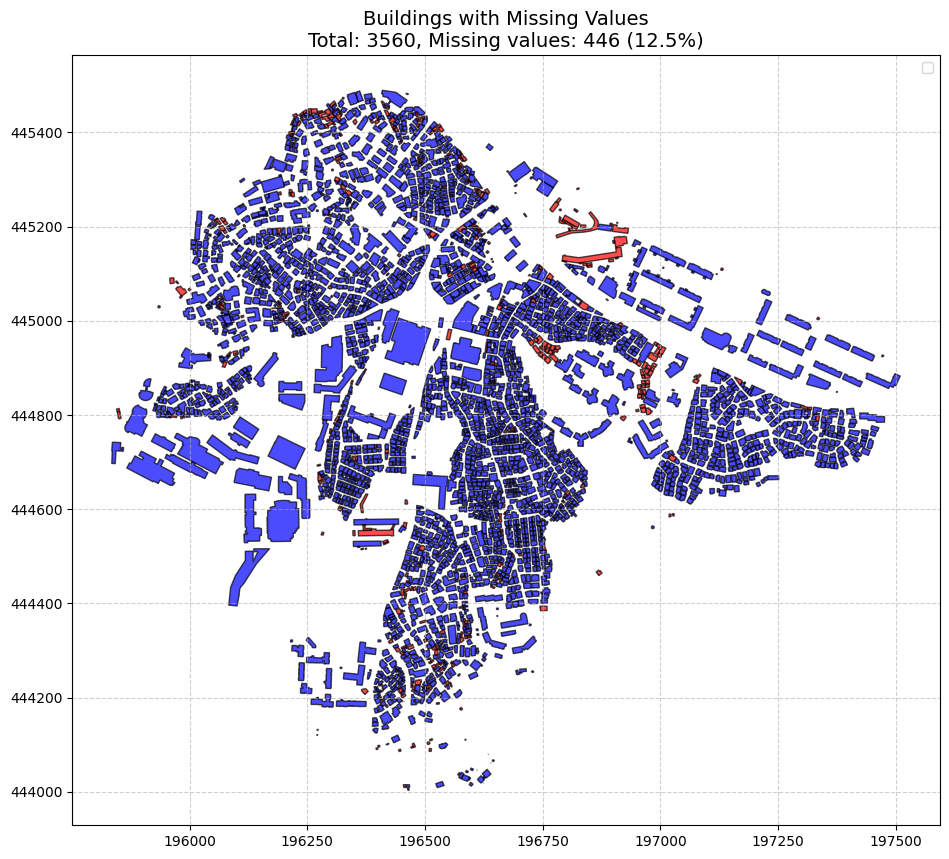


Missing values breakdown:
GFA (m2): 446 buildings (100.0% of buildings with missing values)
Height (m): 446 buildings (100.0% of buildings with missing values)
floors: 446 buildings (100.0% of buildings with missing values)


In [86]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Find rows that still have zeros in any of the target columns
columns_to_check = ['GFA (m2)', 'Height (m)', 'floors']
remaining_zeros_mask = (흑석동_4th_2015[columns_to_check] == 0).any(axis=1)
rows_with_zeros = 흑석동_4th_2015[remaining_zeros_mask]
rows_complete = 흑석동_4th_2015[~remaining_zeros_mask]

# Count buildings in each category
zero_count = len(rows_with_zeros)
complete_count = len(rows_complete)
total_count = len(흑석동_4th_2015)

# Plot buildings with complete data in blue
rows_complete.plot(ax=ax, color='blue', edgecolor='black', alpha=0.7, 
                  label=f'Buildings with complete data ({complete_count})')

# Plot buildings with missing values in red
rows_with_zeros.plot(ax=ax, color='red', edgecolor='black', alpha=0.7,
                    label=f'Buildings with missing values ({zero_count})')

# Add title and legend
ax.set_title(f'Buildings with Missing Values\nTotal: {total_count}, Missing values: {zero_count} ({zero_count/total_count*100:.1f}%)', 
             fontsize=14)
ax.legend(loc='upper right')

# Remove axis labels for cleaner look
ax.set_xlabel('')
ax.set_ylabel('')

# Add grid for better orientation
ax.grid(True, linestyle='--', alpha=0.6)

# Save and show the plot
plt.savefig('buildings_with_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

# Print stats about which columns are missing
zero_counts_by_column = {col: (rows_with_zeros[col] == 0).sum() for col in columns_to_check}
print("\nMissing values breakdown:")
for col, count in zero_counts_by_column.items():
    if count > 0:
        print(f"{col}: {count} buildings ({count/zero_count*100:.1f}% of buildings with missing values)")

In [184]:
흑석동_1159010500102450001 = 흑석동_4th_2015[흑석동_4th_2015['GIS building identification number']=='1993196106014447470600000000']
흑석동_1159010500102450001

,Shape ID,GIS building identification number,Unique number,Dong code,Street name,Street number,Special district code,Special district name,Building use code,Building use name,...,Height (m),Building to land ratio (%),FAR (%),Building ID,Violation?,Reference system key,Database date,geometry,Calculated Area,floors


In [196]:

흑석동_115901050010245000 = 흑석동_4th_2015[흑석동_4th_2015['GIS building identification number']=='1996196396444445728600000000']
흑석동_115901050010245000

,Shape ID,GIS building identification number,Unique number,Dong code,Street name,Street number,Special district code,Special district name,Building use code,Building use name,...,Height (m),Building to land ratio (%),FAR (%),Building ID,Violation?,Reference system key,Database date,geometry,Calculated Area,floors
2380,24798,1996196396444445728600000000,1159010500102450001,1159010500,서울특별시 동작구 흑석동,245-1,1,일반,10000,교육연구시설,...,13.2,12.15,36.87,4477,0,B00100000000MT2RM,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",1089.125061,4


In [94]:
흑석동_4th_2015.sort_values(by='Calculated Area', ascending=True).head(20)

,Shape ID,GIS building identification number,Unique number,Dong code,Street name,Street number,Special district code,Special district name,Building use code,Building use name,...,Height (m),Building to land ratio (%),FAR (%),Building ID,Violation?,Reference system key,Database date,geometry,Calculated Area,floors
2379,24797,1983196498334441995900000000,1159010500102520052,1159010500,서울특별시 동작구 흑석동,252-52,1,일반,None,None,...,0.0000,0.0000,0.0000,None,None,None,2015-11-18,"POLYGON ((1.96e+05 4.44e+05, 1.96e+05 4.44e+05...",0.016168,0
2702,21152,0000196393184441950000000000,1159010500102570132,1159010500,서울특별시 동작구 흑석동,257-132,1,일반,None,None,...,0.0000,0.0000,0.0000,None,None,None,2015-11-18,"POLYGON ((1.96e+05 4.44e+05, 1.96e+05 4.44e+05...",0.021910,0
810,17080,0000196835724450062400000000,1159010500100430051,1159010500,서울특별시 동작구 흑석동,43-51,1,일반,None,None,...,6.0000,0.0000,0.0000,None,None,None,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",0.031871,2
2241,32570,1986197369934447862000000000,1159010500102740003,1159010500,서울특별시 동작구 흑석동,274-3,1,일반,01000,단독주택,...,6.0000,49.2000,98.3900,21729,0,B00100000001356QI,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",0.080000,2
2155,32563,0000196613784452081900000000,1159010500101080005,1159010500,서울특별시 동작구 흑석동,108-5,1,일반,01000,단독주택,...,0.0000,0.0000,0.0000,900001938,0,None,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",0.080000,0
1642,32367,0000196630044445364400000000,1159010500100800003,1159010500,서울특별시 동작구 흑석동,80-3,1,일반,01000,단독주택,...,54.0000,1.3800,1.3800,3279,0,None,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",0.080000,18
3099,32514,2011196623894440192800000000,1159010500200610034,1159010500,서울특별시 동작구 흑석동,61-34,2,산,06000,종교시설,...,7.3500,0.0000,0.0000,100196035,0,B0010000000BIZWUX,2015-11-18,"POLYGON ((1.97e+05 4.44e+05, 1.97e+05 4.44e+05...",0.080000,1
1660,32509,1960196416084442088800000000,1159010500102570055,1159010500,서울특별시 동작구 흑석동,257-55,1,일반,01000,단독주택,...,3.0000,0.0000,0.0000,28589,0,B00100000000MRM2F,2015-11-18,"POLYGON ((1.96e+05 4.44e+05, 1.96e+05 4.44e+05...",0.080000,1
1438,32512,2011196639654440615000000000,1159010500200610034,1159010500,서울특별시 동작구 흑석동,61-34,2,산,06000,종교시설,...,6.0300,0.0000,0.0000,100196034,0,B001000000013378Y,2015-11-18,"POLYGON ((1.97e+05 4.44e+05, 1.97e+05 4.44e+05...",0.080000,1
1953,32558,1974196529244449662100000000,1159010500102250017,1159010500,서울특별시 동작구 흑석동,225-17,1,일반,03000,제1종근린생활시설,...,9.0000,0.0000,0.0000,13467,0,B0010000000136DOO,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",0.080000,3


In [ ]:
2015196400974445854100000000
    196400974445854100000000

/var/folders/5v/5nwj3q8d66j_03jpgzv73xt40000gn/T/ipykernel_39878/216248310.py:60: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


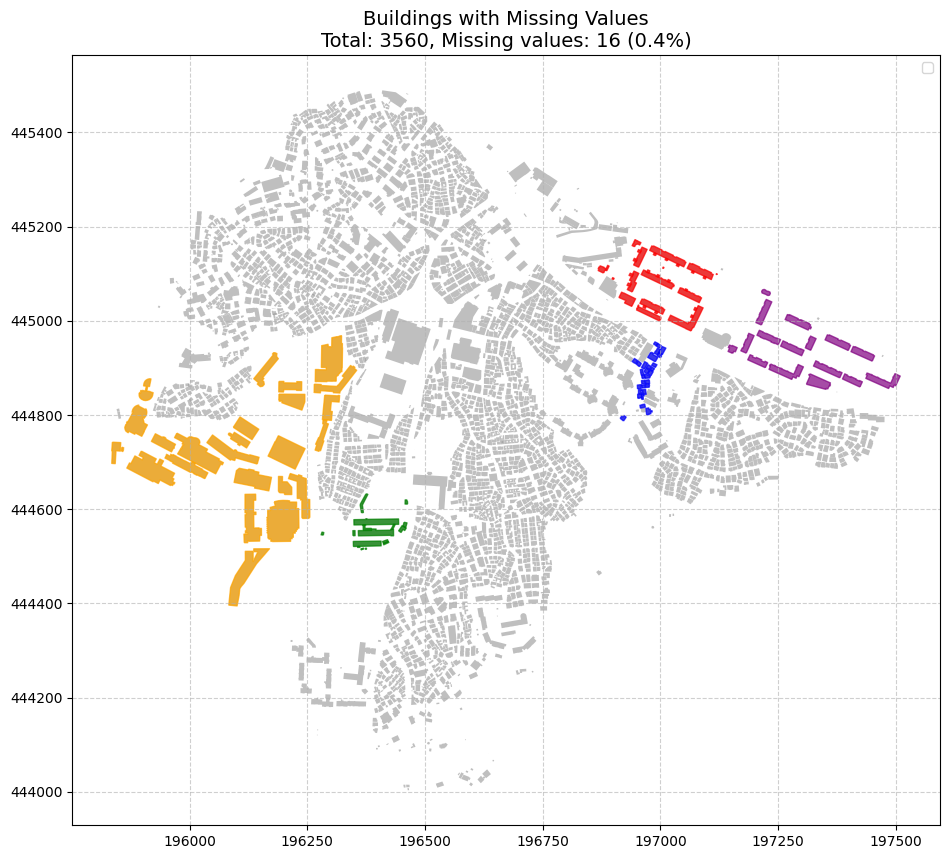


Missing values breakdown:


In [218]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Find rows that still have zeros in any of the target columns
check_1159010500100100000 = ['Unique number']
remaining_zeros_mask = (흑석동_4th_2015[height_check] == '1159010500100100000').any(axis=1)
share_1159010500100100000 = 흑석동_4th_2015[remaining_zeros_mask]
rows_complete = 흑석동_4th_2015[~remaining_zeros_mask]

check_1159010500103350004 = ['Unique number']
remaining_zeros_mask = (흑석동_4th_2015[height_check] == '1159010500103350004').any(axis=1)
share_1159010500103350004 = 흑석동_4th_2015[remaining_zeros_mask]
rows_complete = 흑석동_4th_2015[~remaining_zeros_mask]

check_1159010500102210000 = ['Unique number']
remaining_zeros_mask = (흑석동_4th_2015[height_check] == '1159010500102210000').any(axis=1)
share_1159010500102210000 = 흑석동_4th_2015[remaining_zeros_mask]
rows_complete = 흑석동_4th_2015[~remaining_zeros_mask]

check_1159010500102450001 = ['Unique number']
remaining_zeros_mask = (흑석동_4th_2015[height_check] == '1159010500102450001').any(axis=1)
share_1159010500102450001 = 흑석동_4th_2015[remaining_zeros_mask]
rows_complete = 흑석동_4th_2015[~remaining_zeros_mask]

check_1159010500100280000 = ['Unique number']
remaining_zeros_mask = (흑석동_4th_2015[height_check] == '1159010500100280000').any(axis=1)
share_1159010500100280000 = 흑석동_4th_2015[remaining_zeros_mask]
rows_complete = 흑석동_4th_2015[~remaining_zeros_mask]

# Count buildings in each category
zero_count = len(rows_with_zeros)
complete_count = len(rows_complete)
total_count = len(흑석동_4th_2015)

# Plot buildings with complete data in blue
rows_complete.plot(ax=ax, color='grey', alpha=0.5, 
                  label=f'Buildings with complete data ({complete_count})')

# Plot buildings with missing values in red
share_1159010500100100000.plot(ax=ax, color='red', edgecolor='red', alpha=0.7,
                    label=f'Buildings with missing values ({zero_count})')

share_1159010500103350004.plot(ax=ax, color='blue', edgecolor='blue', alpha=0.7,
                    label=f'Buildings with missing values ({zero_count})')

share_1159010500102210000.plot(ax=ax, color='orange', edgecolor='orange', alpha=0.7,
                    label=f'Buildings with missing values ({zero_count})')

share_1159010500102450001.plot(ax=ax, color='green', edgecolor='green', alpha=0.7,
                    label=f'Buildings with missing values ({zero_count})')

share_1159010500100280000.plot(ax=ax, color='purple', edgecolor='purple', alpha=0.7,
                    label=f'Buildings with missing values ({zero_count})')

# Add title and legend
ax.set_title(f'Buildings with Missing Values\nTotal: {total_count}, Missing values: {zero_count} ({zero_count/total_count*100:.1f}%)', 
             fontsize=14)
ax.legend(loc='upper right')

# Remove axis labels for cleaner look
ax.set_xlabel('')
ax.set_ylabel('')

# Add grid for better orientation
ax.grid(True, linestyle='--', alpha=0.6)

# Save and show the plot
plt.savefig('buildings_with_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

# Print stats about which columns are missing
zero_counts_by_column = {col: (rows_with_zeros[col] == 0).sum() for col in columns_to_check}
print("\nMissing values breakdown:")
for col, count in zero_counts_by_column.items():
    if count > 0:
        print(f"{col}: {count} buildings ({count/zero_count*100:.1f}% of buildings with missing values)")

In [220]:
import pandas as pd

# Check for duplicate 'Unique number' values
unique_numbers = 흑석동_4th_2015['Unique number']
duplicate_counts = unique_numbers.value_counts()

# Find numbers that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]

# Display the results
if len(duplicates) > 0:
    print(f"Found {len(duplicates)} 'Unique number' values that appear in multiple rows:")
    print(f"Total of {duplicates.sum()} rows contain duplicate 'Unique number' values")
    
    print("\nDuplicate 'Unique number' values and their counts:")
    print(duplicates)
    
    # Show some examples of duplicate rows
    for unique_num in duplicates.index[:5]:  # Show first 5 duplicates
        dup_rows = 흑석동_4th_2015[흑석동_4th_2015['Unique number'] == unique_num]
        print(f"\nRows with 'Unique number' = {unique_num} ({len(dup_rows)} occurrences):")
        display(dup_rows[['GIS building identification number', 'Unique number', 'Building footprint (m2)', 'GFA (m2)', 'Height (m)', 'floors']])
else:
    print("No duplicate 'Unique number' values found. Each 'Unique number' appears only once.")

Found 372 'Unique number' values that appear in multiple rows:
Total of 1111 rows contain duplicate 'Unique number' values

Duplicate 'Unique number' values and their counts:
Unique number
1159010500100100000    34
1159010500103350004    29
1159010500102210000    25
1159010500102450001    17
1159010500100280000    16
                       ..
1159010500100740046     2
1159010500100020001     2
1159010500100860096     2
1159010500102790008     2
1159010500101730124     2
Name: count, Length: 372, dtype: int64

Rows with 'Unique number' = 1159010500100100000 (34 occurrences):


,GIS building identification number,Unique number,Building footprint (m2),GFA (m2),Height (m),floors
16,1988196988094451414700000000,1159010500100100000,118.00,583.00,9.0,3
64,1988197093874450917900000000,1159010500100100000,118.00,583.00,9.0,3
71,1988197015924451374000000000,1159010500100100000,853.02,13114.08,9.0,3
155,0000196948374451648500000000,1159010500100100000,118.00,583.00,9.0,3
260,0000196952904450319400000000,1159010500100100000,118.00,583.00,9.0,3
376,1988196975244450151100000000,1159010500100100000,429.20,1388.40,9.0,3
437,1988196955014451478400000000,1159010500100100000,118.00,583.00,9.0,3
461,1988197012844451300900000000,1159010500100100000,118.00,583.00,9.0,3
577,1988197017684450847200000000,1159010500100100000,118.00,583.00,9.0,3
608,1988197084614451056300000000,1159010500100100000,653.64,10075.20,9.0,3



Rows with 'Unique number' = 1159010500103350004 (29 occurrences):


,GIS building identification number,Unique number,Building footprint (m2),GFA (m2),Height (m),floors
166,0000196965794448489900000000,1159010500103350004,64.336716,0.0,0.0,0
253,0000196963254448809900000000,1159010500103350004,34.616587,0.0,0.0,0
387,0000196955534448400400000000,1159010500103350004,64.892252,0.0,0.0,0
391,0000196962054448187200000000,1159010500103350004,68.790623,0.0,0.0,0
410,0000196920884447934400000000,1159010500103350004,78.553458,0.0,0.0,0
654,0000196963894448608100000000,1159010500103350004,45.978791,0.0,0.0,0
793,0000196957044448490600000000,1159010500103350004,65.582991,0.0,0.0,0
884,0000196954934448599800000000,1159010500103350004,65.517790,0.0,0.0,0
977,0000196989844449512700000000,1159010500103350004,40.422939,0.0,0.0,0
1020,0000196962054448391000000000,1159010500103350004,43.404125,0.0,0.0,0



Rows with 'Unique number' = 1159010500102210000 (25 occurrences):


,GIS building identification number,Unique number,Building footprint (m2),GFA (m2),Height (m),floors
1232,1962196161834448956100000000,1159010500102210000,2137.32,9182.53,21.60,5
1649,1956196312754448684600000000,1159010500102210000,2599.18,10093.11,20.00,5
1650,1974196296134448181900000000,1159010500102210000,1108.49,7860.90,20.00,5
1651,2005196280654447540200000000,1159010500102210000,814.30,3707.30,20.60,5
1652,1996196201254446470600000000,1159010500102210000,852.34,2245.09,13.70,5
1653,1995196130174445760600000000,1159010500102210000,1694.22,8414.09,24.20,5
1654,2011196133954446635300000000,1159010500102210000,814.00,3707.00,20.00,5
1655,2004195857334447270600000000,1159010500102210000,22.92,22.92,3.70,5
1656,1995195907864448493400000000,1159010500102210000,553.24,2757.20,20.00,5
1657,1959196205994447205400000000,1159010500102210000,3429.43,14258.20,26.70,5



Rows with 'Unique number' = 1159010500102450001 (17 occurrences):


,GIS building identification number,Unique number,Building footprint (m2),GFA (m2),Height (m),floors
1118,1996196396074445497000000000,1159010500102450001,51.761177,0.00,0.0000,0
1444,0000196432194445623100000000,1159010500102450001,51.761177,0.00,0.0000,0
1466,0000196375034445591300000000,1159010500102450001,51.761177,0.00,0.0000,0
1496,1996196349064445490500000000,1159010500102450001,51.761177,0.00,0.0000,0
1689,0000196359224445198600000000,1159010500102450001,51.761177,0.00,0.0000,0
1690,0000196374364445160100000000,1159010500102450001,51.761177,0.00,0.0000,0
1691,0000196365224445149200000000,1159010500102450001,51.761177,0.00,0.0000,0
1759,0000196368524446127400000000,1159010500102450001,51.761177,0.00,0.0000,0
1814,0000196417074445278000000000,1159010500102450001,51.761177,0.00,0.0000,0
1815,0000196368164445161700000000,1159010500102450001,51.761177,0.00,0.0000,0



Rows with 'Unique number' = 1159010500100280000 (16 occurrences):


,GIS building identification number,Unique number,Building footprint (m2),GFA (m2),Height (m),floors
57,1988197152464449400200000000,1159010500100280000,170.1000,366.300,45.0,15
110,1988197268654448921700000000,1159010500100280000,838.0550,13178.855,45.0,15
349,1988197292524449972400000000,1159010500100280000,579.7600,9048.440,45.0,15
703,1988197184974449523500000000,1159010500100280000,390.1000,6002.780,45.0,15
920,1988197355184448967500000000,1159010500100280000,585.1500,9008.400,45.0,15
993,1988197206374449139900000000,1159010500100280000,390.1000,6002.780,45.0,15
1022,1988197229874449644000000000,1159010500100280000,516.8800,8010.920,45.0,15
1121,1988197376904449542400000000,1159010500100280000,579.7600,9048.440,45.0,15
1181,1988197280024449416400000000,1159010500100280000,516.8800,8010.920,45.0,15
1324,1988197407584448732300000000,1159010500100280000,390.1000,6002.780,45.0,15


In [230]:
흑석동_4th_2015

,Shape ID,GIS building identification number,Unique number,Dong code,Street name,Street number,Special district code,Special district name,Building use code,Building use name,...,Height (m),Building to land ratio (%),FAR (%),Building ID,Violation?,Reference system key,Database date,geometry,Calculated Area,floors
0,13179,1970196321754452744700000000,1159010500101730057,1159010500,서울특별시 동작구 흑석동,173-57,1,일반,01000,단독주택,...,6.000,0.00,0.00,10526,0,B00100000000MS4IE,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",106.720614,2
1,13188,2002196593674446795600000000,1159010500100840047,1159010500,서울특별시 동작구 흑석동,84-47,1,일반,01000,단독주택,...,6.000,52.91,99.24,23437,0,B0010000000135IQU,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",112.631787,2
2,12482,2001196497384445410700000000,1159010500100860060,1159010500,서울특별시 동작구 흑석동,86-60,1,일반,01000,단독주택,...,7.400,59.78,167.14,22422,1,B00100000000MS62Z,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.96e+05 4.45e+05...",83.338732,3
3,12503,1974196530064442786900000000,1159010500100790132,1159010500,서울특별시 동작구 흑석동,79-132,1,일반,01000,단독주택,...,3.135,0.00,0.00,28064,0,B0010000000134WVD,2015-11-18,"POLYGON ((1.97e+05 4.44e+05, 1.97e+05 4.44e+05...",81.908000,1
4,12511,1960196663114449837600000000,1159010500100540146,1159010500,서울특별시 동작구 흑석동,54-146,1,일반,03000,제1종근린생활시설,...,3.000,0.00,0.00,29076,0,B0010000000136FJL,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",55.046321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,23263,1985196169374450920500000000,1159010500102010034,1159010500,서울특별시 동작구 흑석동,201-34,1,일반,01000,단독주택,...,3.000,95.70,95.70,28303,0,B00100000000MSEDJ,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",22.925341,1
3556,24236,1988196890904450713000000000,1159010500100090007,1159010500,서울특별시 동작구 흑석동,9-7,1,일반,06000,종교시설,...,12.000,17.84,56.03,4889,1,B0010000000136591,2015-11-18,"POLYGON ((1.97e+05 4.45e+05, 1.97e+05 4.45e+05...",1095.287031,4
3557,24546,0000196266874450431800000000,1159010500101950001,1159010500,서울특별시 동작구 흑석동,195-1,1,일반,01000,단독주택,...,6.000,0.00,0.00,27325,0,B00100000000MSOCS,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",85.878587,2
3558,26420,1994196318624453684400000000,1159010500101730031,1159010500,서울특별시 동작구 흑석동,173-31,1,일반,02000,공동주택,...,10.600,29.98,89.84,24235,0,B00100000000MRXOD,2015-11-18,"POLYGON ((1.96e+05 4.45e+05, 1.96e+05 4.45e+05...",159.777420,4
